In [1]:
import os
from os import path
import pickle
import matplotlib.pyplot as plt

import pandas as pd
from forg import EmbeddingMetricType


OUTPUT = "../../report/figures"
os.makedirs(OUTPUT, exist_ok=True)


def load_train_costs(label: str):
    with open(path.join("run_data", label, "train_costs.pkl"), "rb") as f:
        return pd.Series(pickle.load(f))


def load_test_costs(label: str):
    with open(path.join("run_data", label, "test_costs.pkl"), "rb") as f:
        return pd.Series(pickle.load(f))

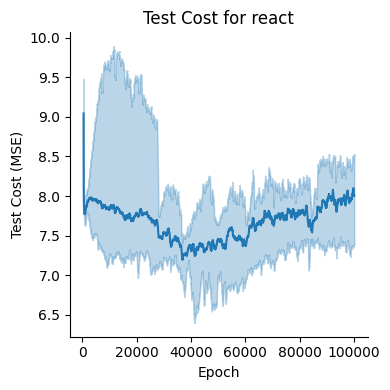

Min cost for react: 6.704 ± 0.265


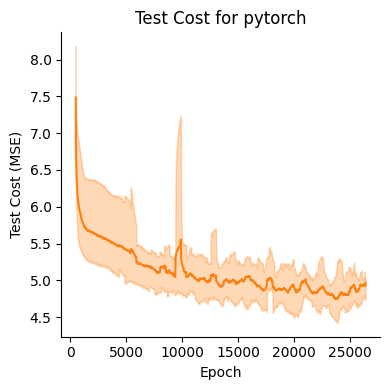

Min cost for pytorch: 4.64 ± 0.143


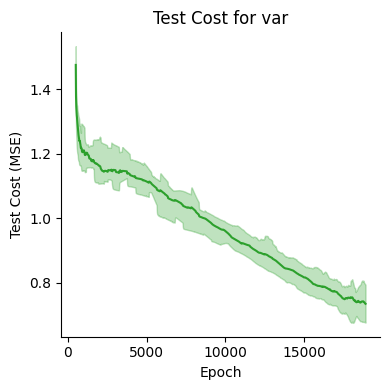

Min cost for var: 0.7166 ± 0.0407


In [68]:
for repo, color in zip(["react", "pytorch", "var"], ["#1F77B4", "#FF7F0F", "#2CA02C"]):
    data = [load_test_costs(f"basic-{repo}-run{i}") for i in range(1, 6)]
    data = pd.concat(data, axis=1)

    first_nan_idx = data.isna().idxmax(axis=0).min()
    if first_nan_idx > 0:
        data = data.loc[:first_nan_idx]

    data = data.rolling(window=500).mean()
    mean = data.mean(axis=1)
    stddev = data.std(axis=1)
    min = data.min(axis=1)
    max = data.max(axis=1)

    plt.figure(figsize=(4, 4))
    plt.plot(mean, label=repo, color=color)
    plt.fill_between(mean.index, min, max, alpha=0.3, color=color)

    plt.xlabel("Epoch")
    plt.ylabel("Test Cost (MSE)")
    plt.title(f"Test Cost for {repo}")

    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    plt.tight_layout()
    plt.savefig(path.join(OUTPUT, f"basic_test_cost_{repo}.pdf"))
    plt.show()

    min_costs = data.min()
    min_costs_mean = min_costs.mean()
    min_costs_stddev = min_costs.std()
    print(f"Min cost for {repo}: {min_costs_mean:.4} ± {min_costs_stddev:.3}")

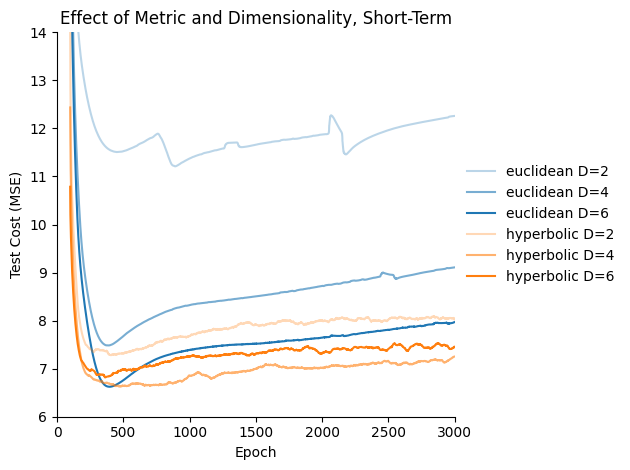

In [2]:
for metric, color in zip(
    [EmbeddingMetricType.EUCLIDEAN, EmbeddingMetricType.HYPERBOLIC],
    ["#1F77B4", "#FF7F0F"],  # blue, orange from tab10
):
    for D, alpha in zip([2, 4, 6], [0.3, 0.6, 1.0]):
        test_costs = load_test_costs(f"metric_and_dimensionality-{metric.value}-D{D}")
        test_costs = test_costs.rolling(window=100).mean()
        plt.plot(test_costs, label=f"{metric.value} D={D}", color=color, alpha=alpha)

plt.xlim(0, 3000)
plt.ylim(6, 14)
plt.xlabel("Epoch")
plt.ylabel("Test Cost (MSE)")
plt.title("Effect of Metric and Dimensionality, Short-Term")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig(path.join(OUTPUT, "metric_and_dimensionality_short_term.pdf"))
plt.show()

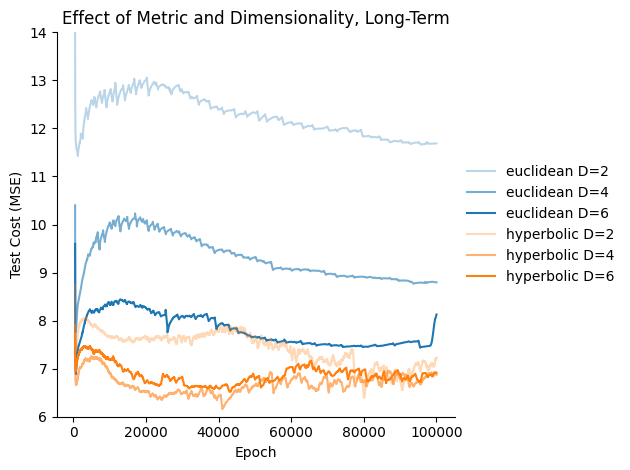

In [3]:
for metric, color in zip(
    [EmbeddingMetricType.EUCLIDEAN, EmbeddingMetricType.HYPERBOLIC],
    ["#1F77B4", "#FF7F0F"],  # blue, orange from tab10
):
    for D, alpha in zip([2, 4, 6], [0.3, 0.6, 1.0]):
        test_costs = load_test_costs(f"metric_and_dimensionality-{metric.value}-D{D}")
        test_costs = test_costs.rolling(window=500).mean()
        plt.plot(test_costs, label=f"{metric.value} D={D}", color=color, alpha=alpha)

plt.ylim(6, 14)
plt.xlabel("Epoch")
plt.ylabel("Test Cost (MSE)")
plt.title("Effect of Metric and Dimensionality, Long-Term")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig(path.join(OUTPUT, "metric_and_dimensionality_long_term.pdf"))
plt.show()

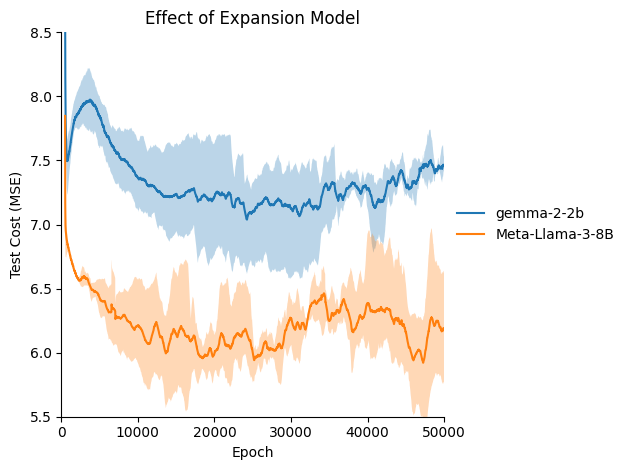

In [4]:
for expansion_model_name in ["gemma-2-2b", "Meta-Llama-3-8B"]:
    data = [
        load_test_costs(f"expansion_model-{expansion_model_name}-run{i}")
        for i in range(3)
    ]
    data = pd.concat(data, axis=1)
    data = data.rolling(window=500).mean()
    mean = data.mean(axis=1)
    low = data.min(axis=1)
    high = data.max(axis=1)

    plt.plot(mean, label=expansion_model_name)
    plt.fill_between(mean.index, low, high, alpha=0.3)

plt.xlim(0, 50000)
plt.ylim(5.5, 8.5)
plt.xlabel("Epoch")
plt.ylabel("Test Cost (MSE)")
plt.title("Effect of Expansion Model")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig(path.join(OUTPUT, "expansion_model.pdf"))
plt.show()

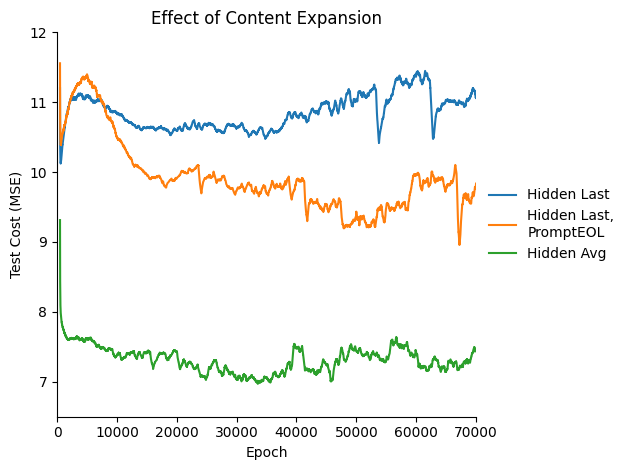

In [5]:
for run_label, label in zip(
    [
        "content_expansion-hidden-last-no-suffix",
        "content_expansion-hidden-last-with-suffix",
        "content_expansion-hidden-avg-no-suffix",
    ],
    [
        "Hidden Last",
        "Hidden Last,\nPromptEOL",
        "Hidden Avg",
    ],
):
    test_costs = load_test_costs(run_label)
    test_costs = test_costs.rolling(window=500).mean()
    plt.plot(test_costs, label=label)

plt.xlim(0, 70000)
plt.ylim(6.5, 12)
plt.xlabel("Epoch")
plt.ylabel("Test Cost (MSE)")
plt.title("Effect of Content Expansion")
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig(path.join(OUTPUT, "content_expansion.pdf"))
plt.show()